# 第16章 モデルを評価する
## 16.1 残差

### データを読み込む

In [1]:
import polars as pl

housing = pl.read_csv("../data/housing_renamed.csv")
housing.head()

neighborhood,type,units,year_built,sq_ft,income,income_per_sq_ft,expense,expense_per_sq_ft,net_income,value,value_per_sq_ft,boro
str,str,i64,f64,i64,i64,f64,i64,f64,i64,i64,f64,str
"""FINANCIAL""","""R9-CONDOMINIUM…",42,1920.0,36500,1332615,36.51,342005,9.37,990610,7300000,200.0,"""Manhattan"""
"""FINANCIAL""","""R4-CONDOMINIUM…",78,1985.0,126420,6633257,52.47,1762295,13.94,4870962,30690000,242.76,"""Manhattan"""
"""FINANCIAL""","""RR-CONDOMINIUM…",500,null,554174,17310000,31.24,3543000,6.39,13767000,90970000,164.15,"""Manhattan"""
"""FINANCIAL""","""R4-CONDOMINIUM…",282,1930.0,249076,11776313,47.28,2784670,11.18,8991643,67556006,271.23,"""Manhattan"""
"""TRIBECA""","""R4-CONDOMINIUM…",239,1985.0,219495,10004582,45.58,2783197,12.68,7221385,54320996,247.48,"""Manhattan"""


### データを学習する

In [2]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 学習
house1 = (
    smf.glm(
        "value_per_sq_ft ~ units + sq_ft + boro",
        data = housing
    )
    .fit()
)

# 学習結果
house1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        value_per_sq_ft   No. Observations:                 2626
Model:                            GLM   Df Residuals:                     2619
Model Family:                Gaussian   Df Model:                            6
Link Function:               Identity   Scale:                          1879.5
Method:                          IRLS   Log-Likelihood:                -13621.
Date:                Mon, 01 Jan 2024   Deviance:                   4.9224e+06
Time:                        21:25:38   Pearson chi2:                 4.92e+06
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7772
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                43.2909      5.330      8.122      0.000      32.845      53.737
boro[T.Brooklyn]         34.5621      5.535      6.244      0.000      23.714      45.411
boro[T.Manhattan]       130.9924      5.385     24.327      0.000     120.439     141.546
boro[T.Queens]           32.9937      5.663      5.827      0.000      21.895      44.092
boro[T.Staten Island]    -3.6303      9.993     -0.363      0.716     -23.216      15.956
units                    -0.1881      0.022     -8.511      0.000      -0.231      -0.145
sq_ft                     0.0002   2.09e-05     10.079      0.000       0.000       0.000
=========================================================================================
"""

### 残差曲線を表示する

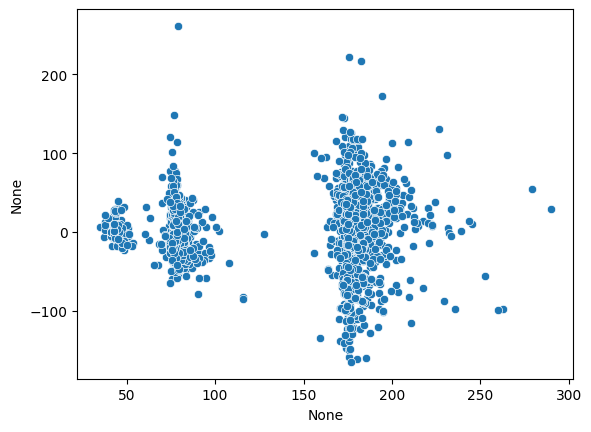

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.scatterplot(
    x = house1.fittedvalues,
    y = house1.resid_deviance,
    ax = ax
)

plt.show()

### 層別した残差曲線を描画する

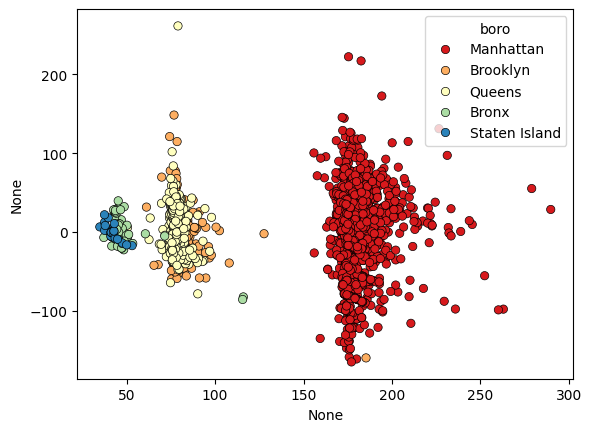

In [7]:
# 層毎の色分け
color_dict = dict(
    {
        "Manhattan": "#d7191c",
        "Brooklyn": "#fdae61",
        "Queens": "#ffffbf",
        "Bronx": "#abdda4",
        "Staten Island": "#2b83ba",
    }
)

fig, ax = plt.subplots()
sns.scatterplot(
    x = house1.fittedvalues,
    y = house1.resid_deviance,
    hue = housing["boro"],
    ax = ax,
    palette = color_dict,
    edgecolor = "black",
)

plt.show()

### Q-Qプロット

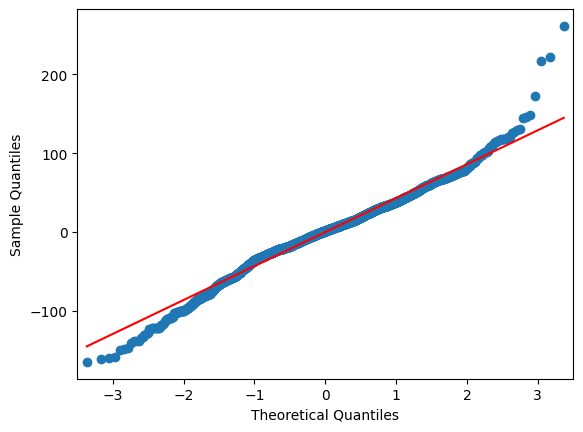

In [8]:
from scipy import stats

resid = house1.resid_deviance.copy()

fig = statsmodels.graphics.gofplots.qqplot(resid, line = "r")
plt.show()


### 残差のヒストグラム

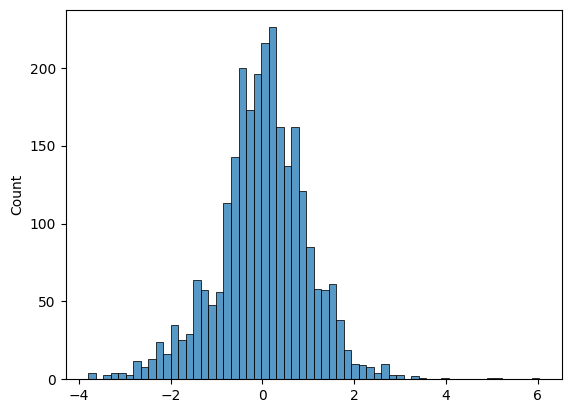

In [9]:
resid_std = stats.zscore(resid)

fig, ax = plt.subplots()
sns.histplot(resid_std, ax = ax)
plt.show()